# Precipitation variability and change
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [5]:
import xarray as xr, pandas as pd, cmocean

import xlearn

from geoplots import mapplot
from climindex import get_climate_index

%matplotlib notebook

In [2]:
new_dims = dict(grid_xt='lon', grid_yt='lat')
with xr.set_options(enable_cftimeindex=True):
    ds = xr.open_dataset('/tigress/wenchang/analysis/volcanic_impact/data/t_surf.CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc')
ds = ds.rename(new_dims)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 576, time: 2400)
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Data variables:
    t_surf   (time, lat, lon) float32 ...
Attributes:
    filename:                  atmos_month.tile1.nc
    title:                     CM2.5_A_Control-1990_FLOR_B01
    grid_type:                 regular
    grid_tile:                 N/A
    history:                   Wed Oct  3 16:39:04 2018: ncrcat -v t_surf /ti...
    code_version:              $Name: tikal_201409 $
    NCO:                       "4.5.5"
    nco_openmp_thread_number:  1

<IPython.core.display.Javascript object>


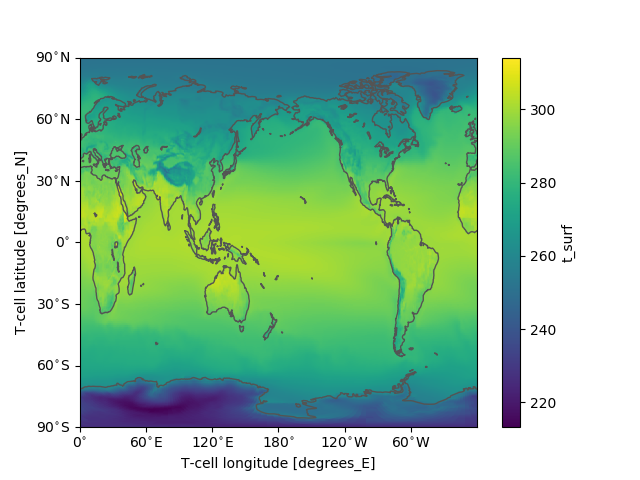

In [7]:
da = ds.t_surf
da.mean('time').plot()

mapplot()

In [11]:
region1 = dict(lat=(25,45), lon=(140,360-145))
region2 = dict(lat=(-10,10), lon=(170,360-90))
region3 = dict(lat=(-50,-15), lon=(150,360-160))

# remove climatology
da = ds.t_surf
da = da.groupby('time.month') - da.groupby('time.month').mean('time')

# the tripole index of IPO
ipo = (da.sel(lon=slice(*region2['lon']), lat=slice(*region2['lat'])).geo.fldmean()
       - da.sel(lon=slice(*region1['lon']), lat=slice(*region1['lat'])).geo.fldmean()/2
       - da.sel(lon=slice(*region3['lon']), lat=slice(*region3['lat'])).geo.fldmean()/2
      )
ipo

<xarray.DataArray (time: 2400)>
array([-0.175393,  0.063098,  0.16169 , ..., -0.73299 , -0.915017, -1.090017])
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...

<IPython.core.display.Javascript object>


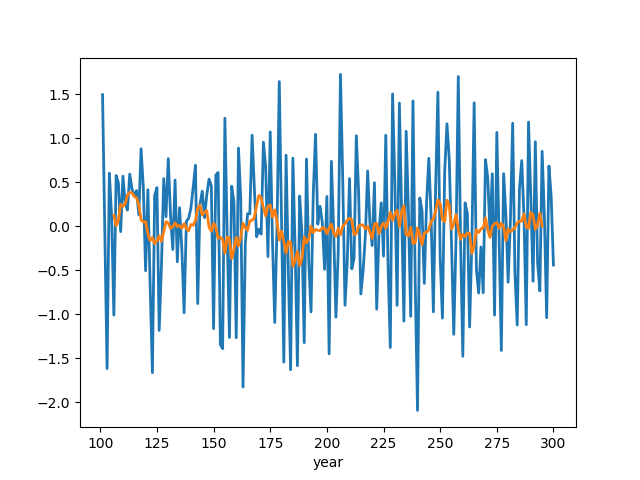

In [15]:
ts = ipo.groupby('time.year').mean('time')
ts.plot()
ts.rolling(year=11, center=True).mean().plot()

In [33]:
y = da
x = ipo
m = y.learn.regress(x, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


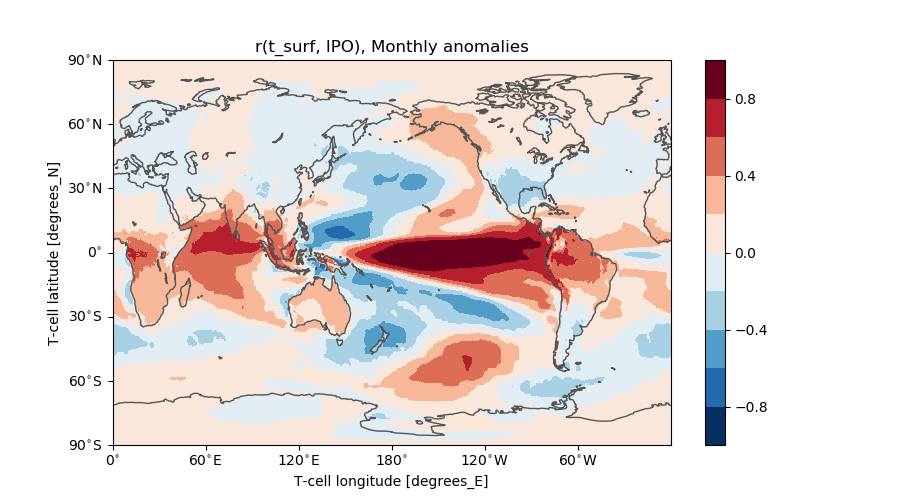

Text(0.5,1,'r(t_surf, IPO), Monthly anomalies')

In [34]:
plt.figure(figsize=(9,5))
m.coef_da.plot(levels=np.arange(-1,1.01,.2))

mapplot()
plt.title('r(t_surf, IPO), Monthly anomalies')

In [48]:
y = da.groupby('time.year').mean('time')
x = ipo.groupby('time.year').mean('time')
m = y.learn.regress(x, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


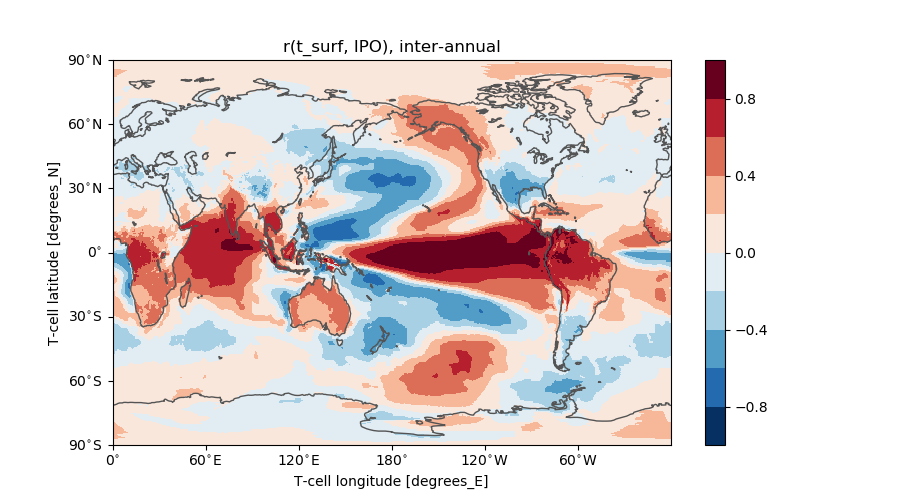

Text(0.5,1,'r(t_surf, IPO), inter-annual')

In [49]:
plt.figure(figsize=(9,5))
m.coef_da.plot(levels=np.arange(-1,1.01,.2))

mapplot()

plt.title('r(t_surf, IPO), inter-annual')

In [30]:
y = da.groupby('time.year').mean('time').rolling(year=11, center=True, min_periods=1).mean()
x = ipo.groupby('time.year').mean('time').rolling(year=11, center=True, min_periods=1).mean()
m = y.learn.regress(x, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


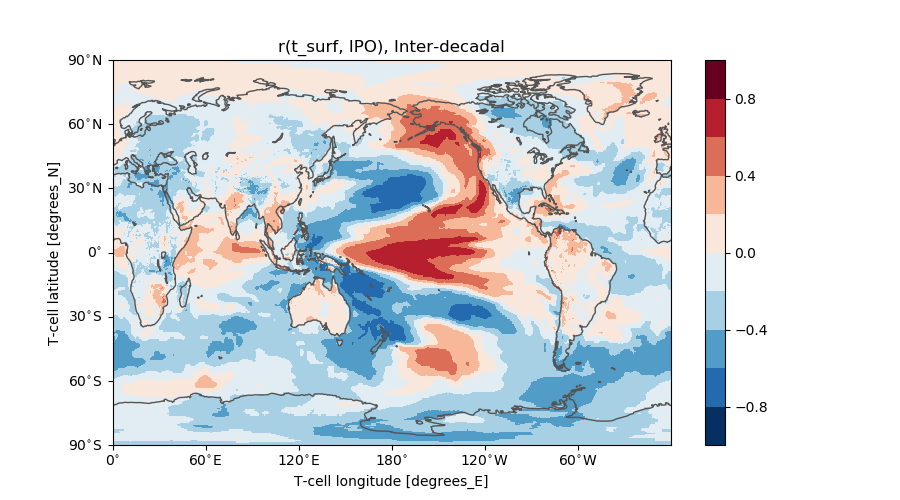

Text(0.5,1,'r(t_surf, IPO), Inter-decadal')

In [32]:
plt.figure(figsize=(9,5))
m.coef_da.plot(levels=np.arange(-1,1.01,.2))

mapplot()

plt.title('r(t_surf, IPO), Inter-decadal')

In [37]:
new_dims = dict(grid_xt='lon', grid_yt='lat')
with xr.set_options(enable_cftimeindex=True):
    precip = xr.open_dataarray('/tigress/wenchang/analysis/volcanic_impact/data/precip.CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.0101_0300.nc')
precip = precip.rename(new_dims)
precip

<xarray.DataArray 'precip' (time: 2400, lat: 360, lon: 576)>
[497664000 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [38]:
y = precip.groupby('time.year').mean('time')
x = ipo.groupby('time.year').mean('time')
m = y.learn.regress(x, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


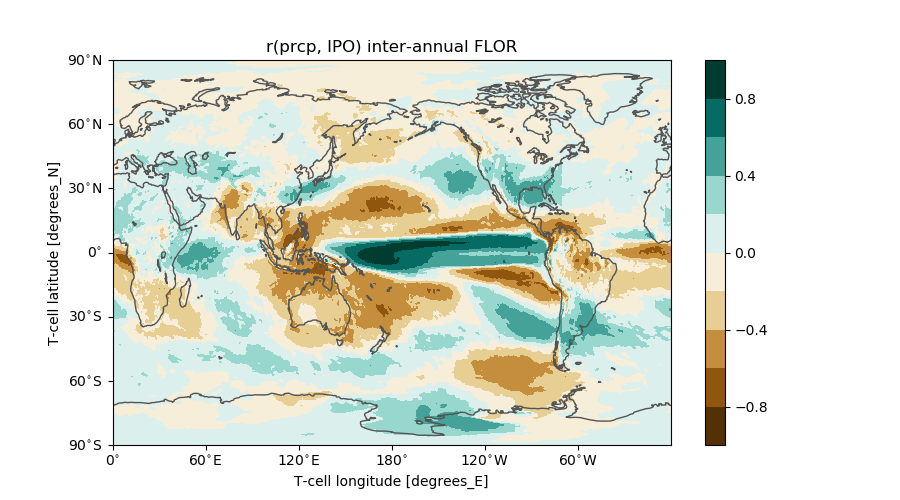

Text(0.5,1,'r(prcp, IPO) inter-annual FLOR')

In [45]:
plt.figure(figsize=(9,5))
m.coef_da.plot(levels=np.arange(-1,1.01,.2), cmap='BrBG')

mapplot()

plt.title('r(prcp, IPO) inter-annual FLOR')

In [46]:
y = precip.groupby('time.year').mean('time').rolling(year=11, center=True, min_periods=1).mean()
x = ipo.groupby('time.year').mean('time').rolling(year=11, center=True, min_periods=1).mean()
m = y.learn.regress(x, normalize_xy=True)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=True, normalize_y=True.

<IPython.core.display.Javascript object>


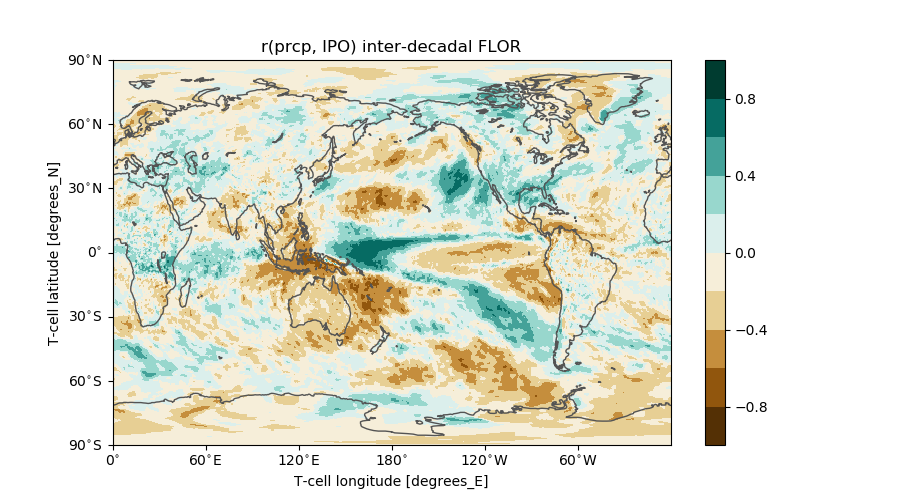

Text(0.5,1,'r(prcp, IPO) inter-decadal FLOR')

In [47]:
plt.figure(figsize=(9,5))
m.coef_da.plot(levels=np.arange(-1,1.01,.2), cmap='BrBG')

mapplot()

plt.title('r(prcp, IPO) inter-decadal FLOR')

In [250]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>